In [2]:
import pandas as pd

In [3]:
cliente = pd.read_csv('./Output/Cliente_ok.csv',usecols = ['ID','Localidad','X','Y'])

In [4]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2297 non-null   int64  
 1   Localidad  2297 non-null   object 
 2   X          2297 non-null   float64
 3   Y          2297 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 71.9+ KB


<AxesSubplot:xlabel='X', ylabel='Y'>

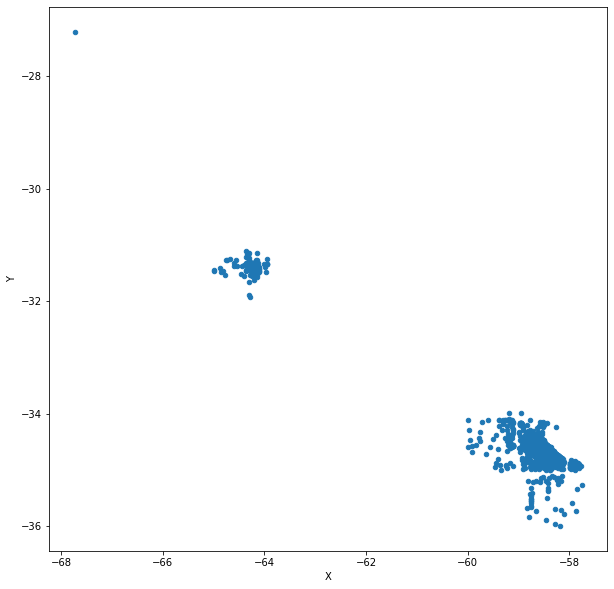

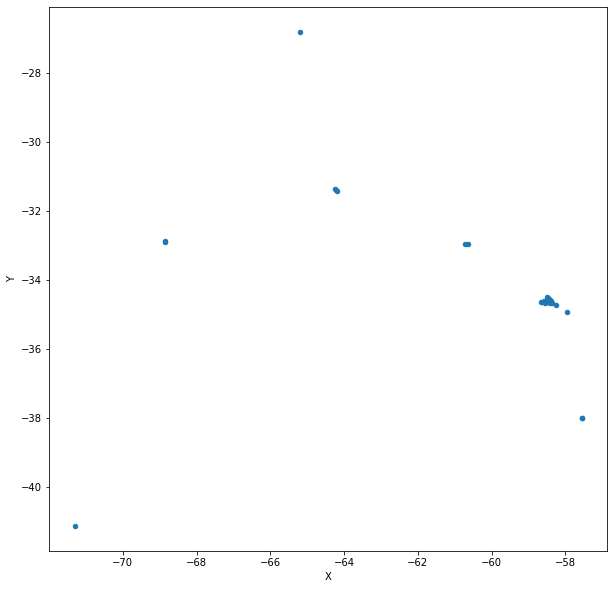

In [58]:
cliente.plot.scatter(x = 'X', y = 'Y', figsize = (10,10))
sucursal.plot.scatter(x = 'X', y = 'Y', figsize = (10,10))

In [6]:
sucursal = pd.read_csv('./Output/Sucursal_ok.csv')

In [7]:
sucursal = sucursal.rename(columns = {'Latitud':'Y','Longitud':'X'})

In [8]:
sucursal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         31 non-null     int64  
 1   Sucursal   31 non-null     object 
 2   Direccion  31 non-null     object 
 3   Localidad  31 non-null     object 
 4   Provincia  31 non-null     object 
 5   Y          31 non-null     float64
 6   X          31 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB


In [54]:
def calcular_min_distancia(sucursales,cliente):

    import pandas as pd

    sucursales['Distancia'] = ((sucursales['X']-cliente['X'])**2+(sucursales['Y']-cliente['Y'])**2)**0.5
    
    distancia = sucursales['Distancia'].min() 
    
    del sucursales
    
    return distancia


In [55]:
cliente['Distancia'] = cliente.apply(lambda x:calcular_min_distancia(sucursal,cliente),axis=1)

In [56]:
cliente.head()

,ID,Localidad,X,Y,Distancia
0,1,LOMA VERDE,-58.818503,-34.309971,0.153049
1,2,SANTA ROSA,-58.730738,-34.939083,0.153049
2,3,TORRES,-59.127941,-34.430822,0.153049
3,4,RUTA SOL,-58.143940,-34.920527,0.153049
4,5,JOSE MELCHOR ROMERO,-58.893810,-34.944447,0.153049


In [10]:
suc_nuevo = sucursal.copy()

In [12]:
suc_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         31 non-null     int64  
 1   Sucursal   31 non-null     object 
 2   Direccion  31 non-null     object 
 3   Localidad  31 non-null     object 
 4   Provincia  31 non-null     object 
 5   Y          31 non-null     float64
 6   X          31 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ KB


In [13]:
cliente.head()

,ID,Localidad,X,Y
0,1,LOMA VERDE,-58.818503,-34.309971
1,2,SANTA ROSA,-58.730738,-34.939083
2,3,TORRES,-59.127941,-34.430822
3,4,RUTA SOL,-58.143940,-34.920527
4,5,JOSE MELCHOR ROMERO,-58.893810,-34.944447


In [15]:
cliente.iloc[0].X

-58.81850307

In [16]:
suc_nuevo['Distancia'] = ((suc_nuevo.X-cliente.iloc[0].X)**2+(suc_nuevo.Y-cliente.iloc[0].Y)**2)**0.5

In [19]:
suc_nuevo.head(15)

,ID,Sucursal,Direccion,Localidad,Provincia,Y,X,Distancia
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,-34.567806,-58.449572,0.450099
1,2,Palermo 1,Guatemala 5701,CABA,CABA,-34.579035,-58.433566,0.469651
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires,-34.595966,-58.405150,0.502647
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,-34.604685,-58.398764,0.512872
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,-34.617308,-58.416179,0.506281
5,6,Caballito,Av. Rivadavia 4708,Capital Federal,Ciudad de Buenos Aires,-34.616303,-58.431849,0.493296
6,7,Flores,Av. Rivadavia 5746,CapFed,Buenos Aires,-34.622868,-58.446449,0.486137
7,8,Alberdi,Av. Juan Bautista Alberdi 1634,Cap. Fed.,Buenos Aires,-34.627306,-58.451498,0.485175
8,9,Deposito,Pedernera 530,Cap. Federal,Buenos Aires,-34.635134,-58.461513,0.482880
9,10,Velez,Av. Juan Bautista Justo 7738,Cdad de Buenos Aires,Ciudad de Buenos Aires,-34.631257,-58.498063,0.453769


In [18]:
suc_nuevo['Distancia'].idxmin()

14

In [22]:
suc_nuevo.iloc[suc_nuevo['Distancia'].idxmin()]

ID                                  15
Sucursal                      Castelar
Direccion                Sta Rosa 1845
Localidad                     Castelar
Provincia    Provincia de Buenos Aires
Y                           -34.639304
X                           -58.655671
Distancia                     0.367389
Name: 14, dtype: object

In [21]:
suc_nuevo.Distancia.describe()

count    31.000000
mean      2.748620
std       3.784365
min       0.367389
25%       0.461970
50%       0.512872
75%       3.902211
max      14.230661
Name: Distancia, dtype: float64

In [67]:
cliente[[ 'ID','Localidad'] ].groupby(by = 'Localidad').count().sort_values(by = 'ID', ascending = False)

,ID
Localidad,
CIUDAD DE BUENOS AIRES,416
CORDOBA,106
JOSE C PAZ,35
MERLO,34
BANDFIELD,31
...,...
KILOMETRO 15,1
LA ARABIA,1
LA ARCADIA,1


In [68]:
sucursal[[ 'ID','Localidad'] ].groupby(by = 'Localidad').count().sort_values(by = 'ID', ascending = False)

,ID
Localidad,
Rosario,2
Mendoza,2
Ciudad de Buenos Aires,2
Mar del Plata,2
CABA,2
Avellaneda,1
La Plata,1
San Miguel de Tucumán,1
San Justo,1
